### Pre-processing

#### Load the libraries

In [1]:
from skimage.metrics import structural_similarity
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
import random
from PIL import Image

#### Load the image


(-0.5, 425.5, 451.5, -0.5)

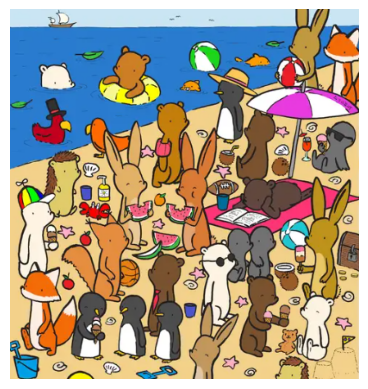

In [2]:
image = cv2.imread("capture.png")
plt.imshow(image[...,::-1])
plt.axis("off")

#### Resizing the image

In [3]:
print(image.shape)

(452, 426, 3)


In [4]:
def image_resize(source):
    height = 1000 
    width = int(1000 / image.shape[0] * image.shape[1])
    dim = (width, height)
    
    # resize image
    resized = cv2.resize(source, dim, interpolation = cv2.INTER_AREA)
    return resized

Image size: (452, 426, 3)
Resized image size: (1000, 942, 3)


(<AxesSubplot:title={'center':'New image'}>,
 Text(0.5, 1.0, 'New image'))

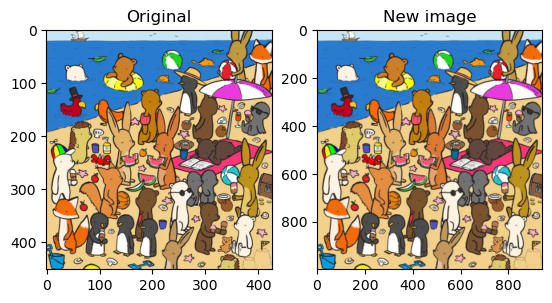

In [5]:
print("Image size: " + str(image.shape))
resized = image_resize(image)
print("Resized image size: " + str(resized.shape))

plt.subplot(121), plt.imshow(image[...,::-1]), plt.title('Original')
plt.subplot(122), plt.imshow(resized[...,::-1]), plt.title('New image')


### Differences Generator

#### Difference 1: Randomly placed shape (Square/ Circle)

In [6]:
image = resized

In [7]:
def getDifferentPicture1(source, maxNumOfDif, shape):
    source = image_resize(source)
    img_res = source.copy()

    height = img_res.shape[0]
    width = img_res.shape[1]

    square_width = square_height = 100
    circle_radius = 100

    for i in range(0, maxNumOfDif):
        h = np.random.randint(0, height)
        w = np.random.randint(0, width)
        if (shape == 'square'):
            cv2.rectangle(img_res, (w, h), (w + square_width, h + square_height), (0, 255, 0), -1)
        if (shape == 'circle'):
            cv2.circle(img_res, (w, h), circle_radius, (255, 0, 0), -1)

    return img_res

(<AxesSubplot:title={'center':'New image'}>,
 Text(0.5, 1.0, 'New image'))

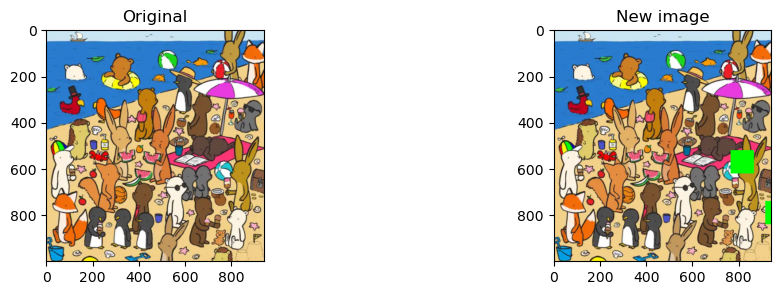

In [8]:
pic1 = getDifferentPicture1(image, 2, 'square')

plt.figure(figsize = (12, 3))
plt.subplot(121),plt.imshow(image[...,::-1]),plt.title('Original')
plt.subplot(122),plt.imshow(pic1[...,::-1]),plt.title('New image')

(<AxesSubplot:title={'center':'New image'}>,
 Text(0.5, 1.0, 'New image'))

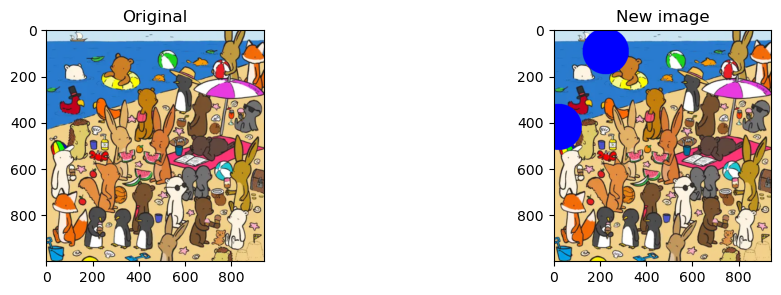

In [9]:
pic1 = getDifferentPicture1(image, 2, 'circle')

plt.figure(figsize = (12, 3))
plt.subplot(121),plt.imshow(image[...,::-1]),plt.title('Original')
plt.subplot(122),plt.imshow(pic1[...,::-1]),plt.title('New image')

#### Difference 2: Insert random Picture 

In [10]:
def resizeInsertImage(source):
    height = 200   
    width = 200
    dim = (width, height)
    
    # resize image
    resized = cv2.resize(source, dim, interpolation = cv2.INTER_AREA)
    return resized

In [11]:
def getDifferentPicture2(source, maxNumOfDif):  
    source = image_resize(source)
    img_res = source.copy()

    insert_image = cv2.imread("smiley_face.png", cv2.IMREAD_UNCHANGED)
    insert_image = resizeInsertImage(insert_image)

    height = img_res.shape[0]
    width = img_res.shape[1]
    
    iheight = insert_image.shape[0]
    iwidth = insert_image.shape[1]

    for i in range(0, maxNumOfDif):
        y = np.random.randint(0, height - iheight)
        x = np.random.randint(0, width - iwidth)    #Inserted picture fully inside the image 
        
        alpha_channel = insert_image[:, :, 3] / 255    # convert from 0-255 to 0.0-1.0
        overlay_colors = insert_image[:, :, :3]

        alpha_mask = np.dstack((alpha_channel, alpha_channel, alpha_channel))
        background_subsection = img_res[y: y+iheight, x:x+iwidth]

        composite = background_subsection * (1 - alpha_mask) + overlay_colors * alpha_mask

        img_res[y: y+iheight, x:x+iwidth] = composite

    return img_res

(<AxesSubplot:title={'center':'New image'}>,
 Text(0.5, 1.0, 'New image'))

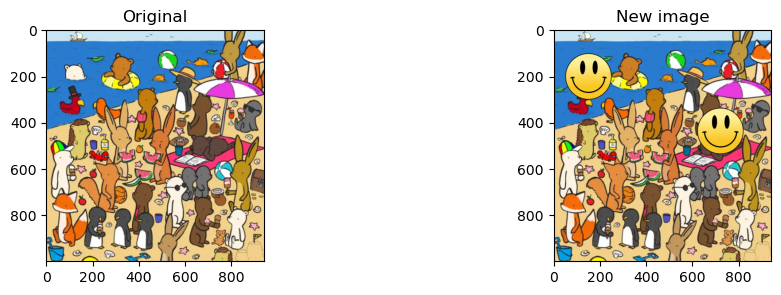

In [12]:
pic2 = getDifferentPicture2(image, 2)

plt.figure(figsize = (12, 3))
plt.subplot(121),plt.imshow(image[...,::-1]),plt.title('Original')
plt.subplot(122),plt.imshow(pic2[...,::-1]),plt.title('New image')

#### Difference 3: Flipping Bounding box of Contours 

In [13]:
def getContours(source):
    img = source.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgCanny = cv2.Canny(gray, 150, 220)
    contours, hierarchy = cv2.findContours(imgCanny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

In [14]:
def getBoundingBoxContour(source, maxNumOfDif):
    contours = getContours(source)

    bounding_box_contour = []

    count = 0

    while(True):
        if (count == maxNumOfDif):
            break
        randNumber = np.random.randint(0, len(contours))
        contourTest = contours[randNumber]
        (x, y, w, h) = cv2.boundingRect(contourTest)
        areaBoundingBox = w*h
        if (areaBoundingBox >= 1000 and areaBoundingBox <= 100000):
            bounding_box_contour.append(cv2.boundingRect(contourTest)) 
            count += 1

    return bounding_box_contour

In [15]:
def rotateImage(source, angle):
   img = source.copy()
   height = img.shape[0]
   width = img.shape[1]
   center = (width / 2, height / 2)
   M = cv2.getRotationMatrix2D(center, angle, 1.0)
   rotated_image = cv2.warpAffine(img, M, (width, height))

   return rotated_image

In [16]:
# def getDifferentPicture3(source, maxNumOfDif):
#     source = image_resize(source)
#     img_res = source.copy()

#     height = img_res.shape[0]
#     width = img_res.shape[1]

#     for i in range(maxNumOfDif):
#         w = 100
#         h = 100
#         y = np.random.randint(0, height - h)
#         x = np.random.randint(0, width - w) 
#         crop_img = img_res[y: y+h, x:x+w]
#         rotated_crop_img = rotateImage(crop_img, 180) #Angle of choice
#         img_res[y: y+h, x:x+w] = rotated_crop_img
        
#     return img_res

In [17]:
def getDifferentPicture3(source, maxNumOfDif):
    source = image_resize(source)
    img_res = source.copy()

    bounding_box_contour = getBoundingBoxContour(img_res, maxNumOfDif)

    for i in range(len(bounding_box_contour)):
        x = bounding_box_contour[i][0]
        y = bounding_box_contour[i][1]
        w = bounding_box_contour[i][2]
        h = bounding_box_contour[i][3]
        crop_img = img_res[y: y+h, x:x+w]
        rotated_crop_img = rotateImage(crop_img, 180) #Angle of choice
        img_res[y: y+h, x:x+w] = rotated_crop_img
        
    return img_res

(<AxesSubplot:title={'center':'New image'}>,
 Text(0.5, 1.0, 'New image'))

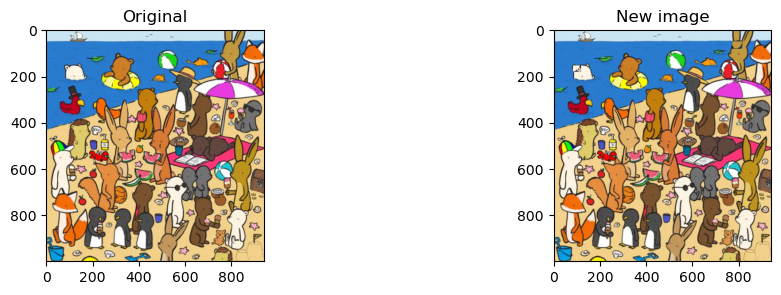

In [18]:
pic3 = getDifferentPicture3(image, 2)

plt.figure(figsize = (12, 3))
plt.subplot(121),plt.imshow(image[...,::-1]),plt.title('Original')
plt.subplot(122),plt.imshow(pic3[...,::-1]),plt.title('New image')

#### Difference 4: Change color inside a contour (color determined by the center of the contour)

In [19]:
def findCentroidOfContour(cnt):
    M = cv2.moments(cnt)

    if (M['m00'] != 0):
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
    
    center = [cx, cy]
    return center

In [20]:
def getDifferentPicture4(source, maxNumOfDif):  
    source = image_resize(source)
    source_pil = Image.fromarray(source)
    pix = source_pil.load()
    img_res = source.copy()
    
    contours = getContours(source)
    count = 0

    while(True):
        if (count == maxNumOfDif):
            break
        randNumber = np.random.randint(0, len(contours))
        contourTest = contours[randNumber]
        
        (x, y, w, h) = cv2.boundingRect(contourTest)
        areaBoundingBox = w*h

        if (areaBoundingBox >= 1000 and areaBoundingBox <= 100000):
            center = findCentroidOfContour(contourTest)
            cx = center[0]
            cy = center[1]
 
            diff_rgb = 100 #tuy chon
            new_tuple = (diff_rgb, diff_rgb, diff_rgb)
            new_color = tuple(abs(np.subtract(pix[cx, cy], new_tuple))) #Tru 2 contours

            a = int(new_color[0])
            b = int(new_color[1])
            c = int(new_color[2])

            cv2.drawContours(img_res, contours, randNumber, (c, b, a), cv2.FILLED)  
            # cv2.fillPoly(img_res, pts = [contourTest], color = [c, b, a] )
            count += 1
            
    return img_res

(<AxesSubplot:title={'center':'New image'}>,
 Text(0.5, 1.0, 'New image'))

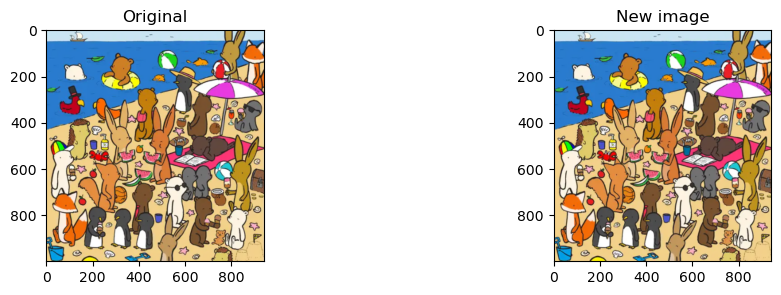

In [21]:
pic4 = getDifferentPicture4(image, 2)

plt.figure(figsize = (12, 3))
plt.subplot(121),plt.imshow(image[...,::-1]),plt.title('Original')
plt.subplot(122),plt.imshow(pic4[...,::-1]),plt.title('New image')

### Differences Detection

#### Difference Detection

In [22]:
def checkDifference(img1, img2): 
    i1 = img1.copy()
    i2 = img2.copy()
    no_of_differences = 0
    
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    #Compute Structural Similarity Index(SSIM)
    (score, diff) = structural_similarity(gray1, gray2, full=True)
    diff = (diff * 255).astype("uint8")
    print("SSIM: {}".format(score))

    thresh = cv2.threshold(diff, 100, 128, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) [1]
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        
        areaBoundingBox = w*h
        if (areaBoundingBox >= 1000 and areaBoundingBox <= 100000):

            no_of_differences += 1
            cv2.rectangle(i1, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.rectangle(i2, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
    print("Number of differences: ", no_of_differences)

    plt.subplot(121); plt.imshow(i1[:,:,::-1]); plt.axis("off"),plt.title('Original detection')
    plt.subplot(122); plt.imshow(i2[:,:,::-1]); plt.axis("off"),plt.title('New image detection')

#### Difference 1 Test

SSIM: 0.985427216169235
Number of differences:  2


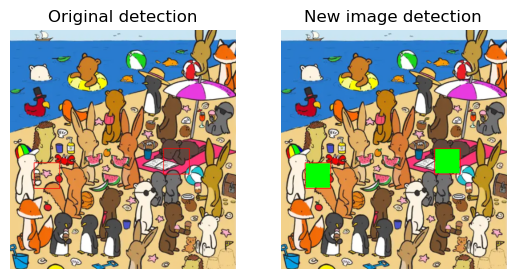

In [23]:
img = image.copy()
picDiff = getDifferentPicture1(img, 2, 'square')
checkDifference(image, picDiff)

SSIM: 0.9414806948280346
Number of differences:  2


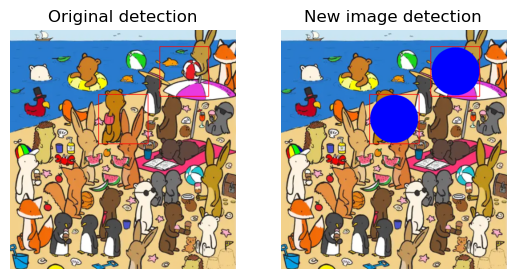

In [24]:
img = image.copy()
picDiff = getDifferentPicture1(img, 2, 'circle')
checkDifference(image, picDiff)

#### Difference 2 Test

SSIM: 0.9463716869771538
Number of differences:  2


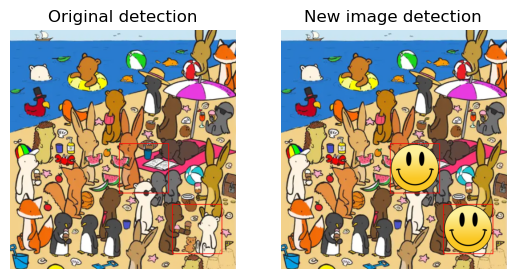

In [25]:
img = image.copy()
picDiff = getDifferentPicture2(img, 2)
checkDifference(img, picDiff)

#### Difference 3 Test

SSIM: 0.9935586089889904
Number of differences:  2


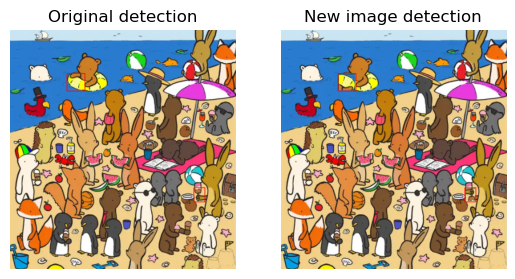

In [26]:
img = image.copy()
picDiff = getDifferentPicture3(img, 2)
checkDifference(img, picDiff)

#### Difference 4 Test

SSIM: 0.9786105417876961
Number of differences:  1


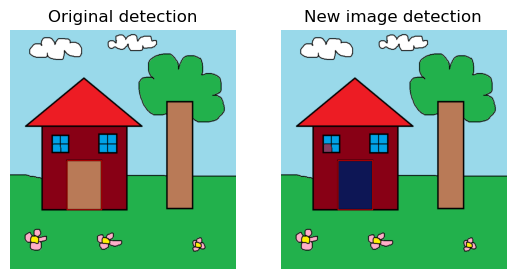

In [34]:
imageMiniTest = cv2.imread('houseFinal.png')
imageMiniTest = image_resize(imageMiniTest)
imgMiniTest = imageMiniTest.copy()
picDiff = getDifferentPicture4(imgMiniTest, 2)
checkDifference(imgMiniTest, picDiff)

SSIM: 0.9992140418689566
Number of differences:  2


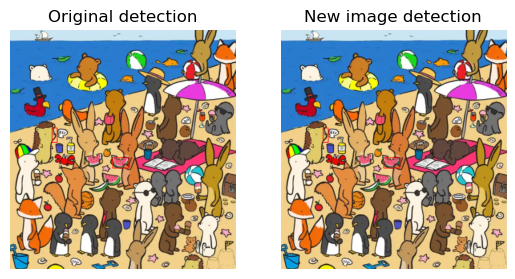

In [31]:
img = image.copy()
picDiff = getDifferentPicture4(img, 2)
checkDifference(img, picDiff)